## Data Analysis Project

***

## Project Description

Since 1972, the General Social Survey (GSS) has been monitoring societal change and studying the growing complexity of American society. The GSS aims to gather data on contemporary American society in order to monitor and explain trends and constants in attitudes, behaviors, and attributes; to examine the structure and functioning of society in general as well as the role played by relevant subgroups; to compare the United States to other societies in order to place American society in comparative perspective and develop cross-national models of human society; and to make high-quality data easily accessible to scholars, students, policy makers, and others, with minimal cost and waiting.

GSS questions cover a diverse range of issues including national spending priorities, marijuana use, crime and punishment, race relations, quality of life, confidence in institutions, and sexual behavior.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("gss.csv")

In [3]:
df

,caseid,year,age,sex,race,hispanic,uscitzn,educ,paeduc,maeduc,speduc,degree,vetyears,sei,wrkstat,wrkslf,marital,spwrksta,sibs,childs,agekdbrn,incom16,born,parborn,granborn,income06,coninc,region,partyid,polviews,relig,attend,natspac,natenvir,natheal,natcity,natcrime,natdrug,nateduc,natrace,natarms,nataid,natfare,natroad,natsoc,natmass,natpark,confinan,conbus,conclerg,coneduc,confed,conlabor,conpress,conmedic,contv,conjudge,consci,conlegis,conarmy,joblose,jobfind,satjob,richwork,jobinc,jobsec,jobhour,jobpromo,jobmeans,class,rank,satfin,finalter,finrela,unemp,govaid,getaid,union,getahead,parsol,kidssol,abdefect,abnomore,abhlth,abpoor,abrape,absingle,abany,pillok,sexeduc,divlaw,premarsx,teensex,xmarsex,homosex,suicide1,suicide2,suicide3,suicide4,fear,owngun,pistol,shotgun,rifle,news,tvhours,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
0,1,1972,23.0,Female,White,NaN,NaN,16.0,10.0,NaN,NaN,Bachelor,NaN,NaN,Working Fulltime,Someone Else,Never Married,NaN,3.0,0.0,NaN,Average,NaN,NaN,NaN,NaN,25926.0,E. Nor. Central,"Ind,Near Dem",NaN,Jewish,Once A Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Little Dissat,NaN,NaN,NaN,NaN,NaN,NaN,Middle Class,NaN,Not At All Sat,Better,Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,Not Wrong At All,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1972,70.0,Male,White,NaN,NaN,10.0,8.0,8.0,12.0,Lt High School,NaN,NaN,Retired,Someone Else,Married,Keeping House,4.0,5.0,NaN,Above Average,NaN,NaN,NaN,NaN,33333.0,E. Nor. Central,Not Str Democrat,NaN,Catholic,Every Week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle Class,NaN,More Or Less,Stayed Same,Above Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,Yes,No,Yes,Yes,NaN,NaN,NaN,NaN,Always Wrong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1972,48.0,Female,White,NaN,NaN,12.0,8.0,8.0,11.0,High School,NaN,NaN,Working Parttime,Someone Else,Married,Working Fulltime,5.0,4.0,NaN,Average,NaN,NaN,NaN,NaN,33333.0,E. Nor. Central,Independent,NaN,Protestant,Once A Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mod. Satisfied,NaN,NaN,NaN,NaN,NaN,NaN,Working Class,NaN,Satisfied,Better,Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,Always Wrong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1972,27.0,Female,White,NaN,NaN,17.0,16.0,12.0,20.0,Bachelor,NaN,NaN,Working Fulltime,Someone Else,Married,Working Fulltime,5.0,0.0,NaN,Average,NaN,NaN,NaN,NaN,41667.0,E. Nor. Central,Not Str Democrat,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very Satisfied,NaN,NaN,NaN,NaN,NaN,NaN,Middle Class,NaN,Not At All Sat,Stayed Same,Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,Always Wrong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once A Week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1972,61.0,Female,White,NaN,NaN,12.0,8.0,8.0,12.0,High School,NaN,NaN,Keeping House,Someone Else,Married,Temp Not Working,2.0,2.0,NaN,Below Average,NaN,NaN,NaN,NaN,69444.0,E. Nor. Central,Strong Democrat,NaN,Protestant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Working Class,NaN,Satisfied,Better,Above Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,Sometimes Wrong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

## Exploratory Data Analysis

In [4]:
df.info(verbose=1, null_counts=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57061 entries, 0 to 57060
Data columns (total 114 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   caseid    57061 non-null  int64  
 1   year      57061 non-null  int64  
 2   age       56859 non-null  float64
 3   sex       57061 non-null  object 
 4   race      57061 non-null  object 
 5   hispanic  18920 non-null  object 
 6   uscitzn   770 non-null    object 
 7   educ      56897 non-null  float64
 8   paeduc    40173 non-null  float64
 9   maeduc    46929 non-null  float64
 10  speduc    29626 non-null  float64
 11  degree    56051 non-null  object 
 12  vetyears  21884 non-null  object 
 13  sei       31277 non-null  float64
 14  wrkstat   57047 non-null  object 
 15  wrkslf    53549 non-null  object 
 16  marital   57041 non-null  object 
 17  spwrksta  30697 non-null  object 
 18  sibs      55382 non-null  float64
 19  childs    56880 non-null  float64
 20  agekdbrn  18119 non-null  f

In [5]:
df.describe(include='all')

,caseid,year,age,sex,race,hispanic,uscitzn,educ,paeduc,maeduc,speduc,degree,vetyears,sei,wrkstat,wrkslf,marital,spwrksta,sibs,childs,agekdbrn,incom16,born,parborn,granborn,income06,coninc,region,partyid,polviews,relig,attend,natspac,natenvir,natheal,natcity,natcrime,natdrug,nateduc,natrace,natarms,nataid,natfare,natroad,natsoc,natmass,natpark,confinan,conbus,conclerg,coneduc,confed,conlabor,conpress,conmedic,contv,conjudge,consci,conlegis,conarmy,joblose,jobfind,satjob,richwork,jobinc,jobsec,jobhour,jobpromo,jobmeans,class,rank,satfin,finalter,finrela,unemp,govaid,getaid,union,getahead,parsol,kidssol,abdefect,abnomore,abhlth,abpoor,abrape,absingle,abany,pillok,sexeduc,divlaw,premarsx,teensex,xmarsex,homosex,suicide1,suicide2,suicide3,suicide4,fear,owngun,pistol,shotgun,rifle,news,tvhours,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
count,57061.000000,57061.000000,56859.000000,57061,57061,18920,770,56897.000000,40173.000000,46929.000000,29626.000000,56051,21884,31277.000000,57047,53549,57041,30697,55382.000000,56880.000000,18119.000000,43739,47804,47766,44996.000000,10070,51232.000000,57061,56734,47876,56828,47092,31227,31614,32081,29096,31781,31415,32255,30309,31427,31506,31758,37495,37360,35634,37741,35053,37175,37362,38222,37637,36504,37939,38312,38149,37102,35771,37614,37647,18772,18672,41277,21948,20572,20574,20571,20570,20568,53636,9854.000000,52454,52318,52115,35507,12085,1460,39378,34977,14827,14597,39216,39093,39384,39028,38981,39020,31807,20748,30680,32684,33548,21702,34019,32789,28826,29574,29504,29208,34295,34459,34219,34211,34211,35689,33855.000000,24086,24421,24459,23827,20166,19072,19327,19884
unique,NaN,NaN,NaN,2,3,28,4,NaN,NaN,NaN,NaN,5,5,NaN,8,2,5,8,NaN,NaN,NaN,6,2,9,NaN,26,NaN,9,8,7,13,8,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,3,4,2,5,5,5,5,5,5,NaN,3,3,5,2,2,2,4,4,5,6,2,2,2,2,2,2,2,4,3,3,4,4,4,5,2,2,2,2,2,3,3,3,3,5,NaN,2,2,2,2,3,3,3,3
top,NaN,NaN,NaN,Female,White,Not Hispanic,Not A U.S. Citizen,NaN,NaN,NaN,NaN,High School,None,NaN,Working Fulltime,Someone Else,Married,Working Fulltime,NaN,NaN,NaN,Average,Yes,Both In U.S,NaN,$60000 To 74999,NaN,South Atlantic,Not Str Democrat,Moderate,Protestant,Every Week,Too Much,Too Little,Too Little,Too Little,Too Little,Too Little,Too Little,About Right,About Right,Too Much,Too Much,About Right,Too Little,About Right,About Right,Only Some,Only Some,Only Some,Only Some,Only Some,Only Some,Only Some,A Great Deal,Only Some,Only Some,Only Some,Only Some,Only Some,Not Likely,Not Easy,Very Satisfied,Continue Working,Third,Fourth,Fifth,Second,Most Impt,Working Class,NaN,More Or Less,Stayed Same,Average,No,No,No,Neither Belongs,Hard Work,Much Better,Somewhat Better,Yes,No,Yes,No,Yes,No,No,Agree,Favor,More Difficult,Not Wrong At All,Always Wrong,Always Wrong,Always Wrong,Yes,No,No,No,No,No,No,No,No,Everyday,NaN,No,No,No,Yes,Agree With Both,Agree With Both,Agree With Both,No Special Treatment
freq,NaN,NaN,NaN,31915,46350,16936,378,NaN,NaN,NaN,NaN,29287,18093,NaN,28207,47352,30761,16815,NaN,NaN,NaN,21941,43705,39137,NaN,891,NaN,10977,12040,18494,33472,11383,14631,19259,21294,14842,21500,19555,20619,13744,13675,22286,15345,18954,21443,18264,22861,19659,22628,18958,21322,19535,20159,20346,17931,20484,19460,17796,21756,17998,11897,7687,19717,15383,6034,6516,10537,7082,9641,24458,NaN,23176,20654,25957,24517,7760,1179,32270,23022,4873,4228,31428,21848,35321,20557,31865,21779,18920,6459,26501,16382,14060,15165,25929,21601,15924,27097,26990,24629,20285,20144,26479,25432,25580,17023,NaN,14456,20987,12454,12765,12273,10874,8903,8656
mean,28531.000000,1992.084261,45.697955,NaN,NaN,NaN,NaN,12.753590,10.554004,10.713844,12.780328,NaN,NaN,48.423570,NaN,NaN,NaN,NaN,3.940053,1.952848,23.787130,NaN,NaN,NaN,1.154547,NaN,44503.038316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.772681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
df.columns

Index(['caseid', 'year', 'age', 'sex', 'race', 'hispanic', 'uscitzn', 'educ', 'paeduc', 'maeduc',
       ...
       'news', 'tvhours', 'racdif1', 'racdif2', 'racdif3', 'racdif4', 'helppoor', 'helpnot', 'helpsick', 'helpblk'], dtype='object', length=114)

### Drop unwanted features

In [7]:
df.columns

Index(['caseid', 'year', 'age', 'sex', 'race', 'hispanic', 'uscitzn', 'educ', 'paeduc', 'maeduc',
       ...
       'news', 'tvhours', 'racdif1', 'racdif2', 'racdif3', 'racdif4', 'helppoor', 'helpnot', 'helpsick', 'helpblk'], dtype='object', length=114)

In [8]:
df=df.select_dtypes(exclude=['object'])

In [9]:
df.head()

,caseid,year,age,educ,paeduc,maeduc,speduc,sei,sibs,childs,agekdbrn,granborn,coninc,rank,tvhours
0,1,1972,23.0,16.0,10.0,NaN,NaN,NaN,3.0,0.0,NaN,NaN,25926.0,NaN,NaN
1,2,1972,70.0,10.0,8.0,8.0,12.0,NaN,4.0,5.0,NaN,NaN,33333.0,NaN,NaN
2,3,1972,48.0,12.0,8.0,8.0,11.0,NaN,5.0,4.0,NaN,NaN,33333.0,NaN,NaN
3,4,1972,27.0,17.0,16.0,12.0,20.0,NaN,5.0,0.0,NaN,NaN,41667.0,NaN,NaN
4,5,1972,61.0,12.0,8.0,8.0,12.0,NaN,2.0,2.0,NaN,NaN,69444.0,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57061 entries, 0 to 57060
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   caseid    57061 non-null  int64  
 1   year      57061 non-null  int64  
 2   age       56859 non-null  float64
 3   educ      56897 non-null  float64
 4   paeduc    40173 non-null  float64
 5   maeduc    46929 non-null  float64
 6   speduc    29626 non-null  float64
 7   sei       31277 non-null  float64
 8   sibs      55382 non-null  float64
 9   childs    56880 non-null  float64
 10  agekdbrn  18119 non-null  float64
 11  granborn  44996 non-null  float64
 12  coninc    51232 non-null  float64
 13  rank      9854 non-null   float64
 14  tvhours   33855 non-null  float64
dtypes: float64(13), int64(2)
memory usage: 6.5 MB


In [11]:
df.columns

Index(['caseid', 'year', 'age', 'educ', 'paeduc', 'maeduc', 'speduc', 'sei', 'sibs', 'childs', 'agekdbrn', 'granborn', 'coninc', 'rank', 'tvhours'], dtype='object')

In [12]:
df.drop(["caseid","speduc","sei",'agekdbrn',"rank","tvhours"],axis=1,inplace=True)

In [13]:
df.head()

,year,age,educ,paeduc,maeduc,sibs,childs,granborn,coninc
0,1972,23.0,16.0,10.0,NaN,3.0,0.0,NaN,25926.0
1,1972,70.0,10.0,8.0,8.0,4.0,5.0,NaN,33333.0
2,1972,48.0,12.0,8.0,8.0,5.0,4.0,NaN,33333.0
3,1972,27.0,17.0,16.0,12.0,5.0,0.0,NaN,41667.0
4,1972,61.0,12.0,8.0,8.0,2.0,2.0,NaN,69444.0


## Data Visualization

### Univariate Data Exploration

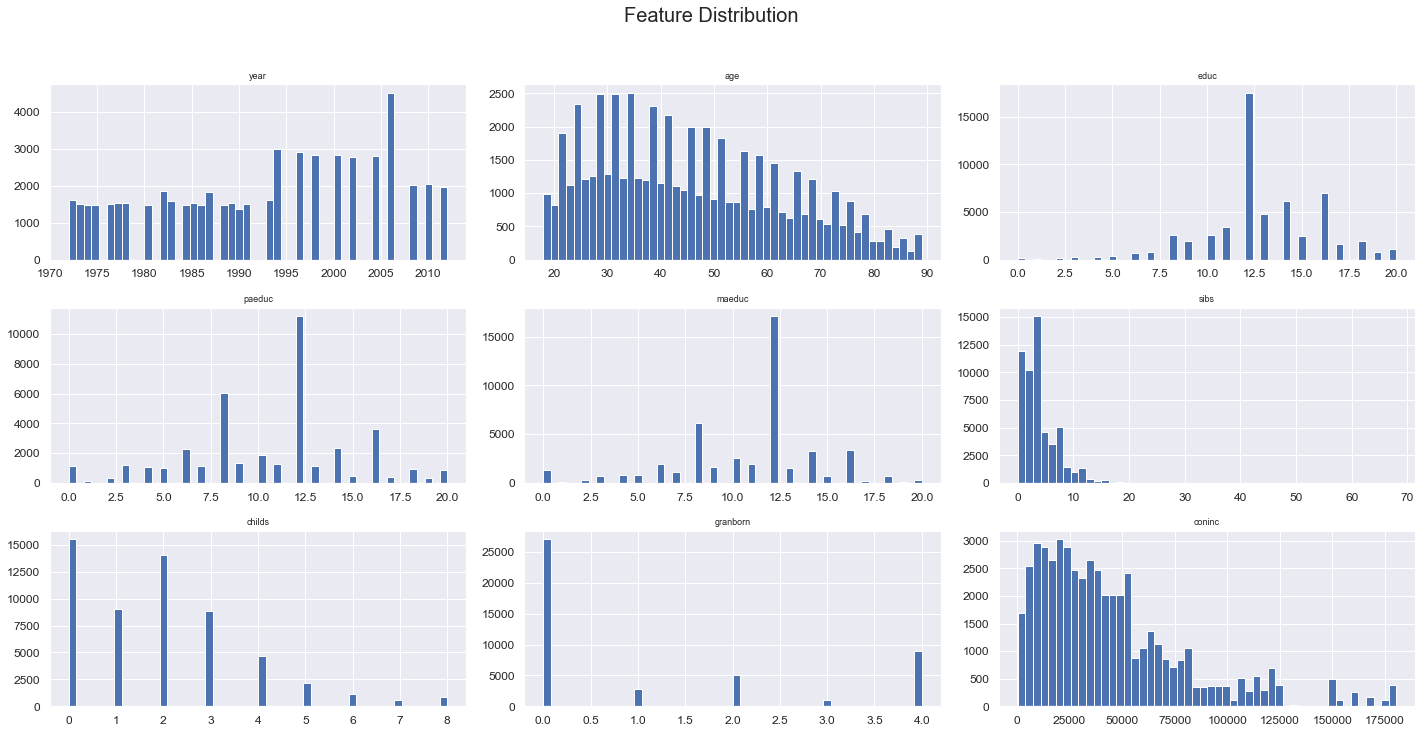

In [14]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

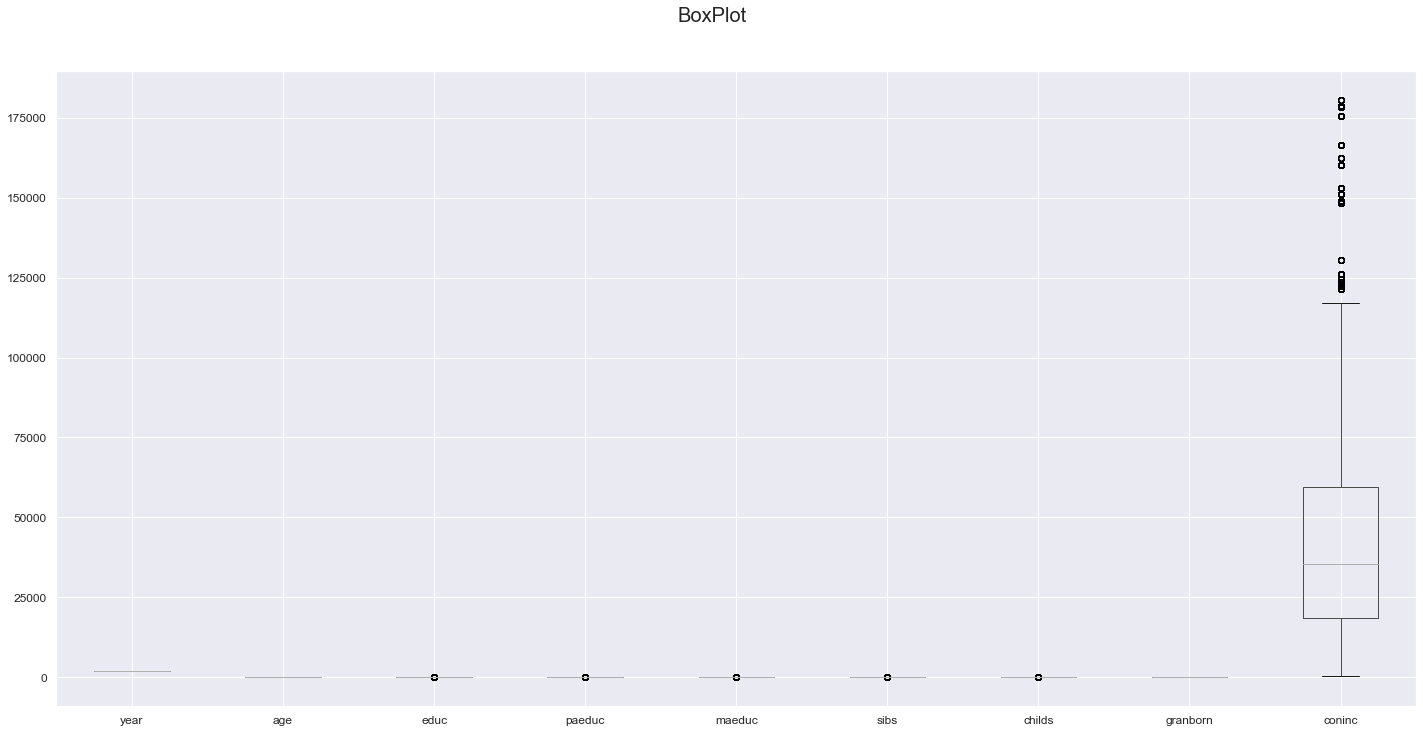

In [15]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

Research question: (3 points) Come up with a research question that you want to answer using these data. You should phrase your research question in a way that matches up with the scope of inference your dataset allows for. You are welcomed to create new variables based on existing ones. Along with your research question include a brief discussion (1-2 sentences) as to why this question is of interest to you and/or your audience.

Target variable: coninc, Independent variables: Others. Check if there are relations or not.

### Time-Series Analysis

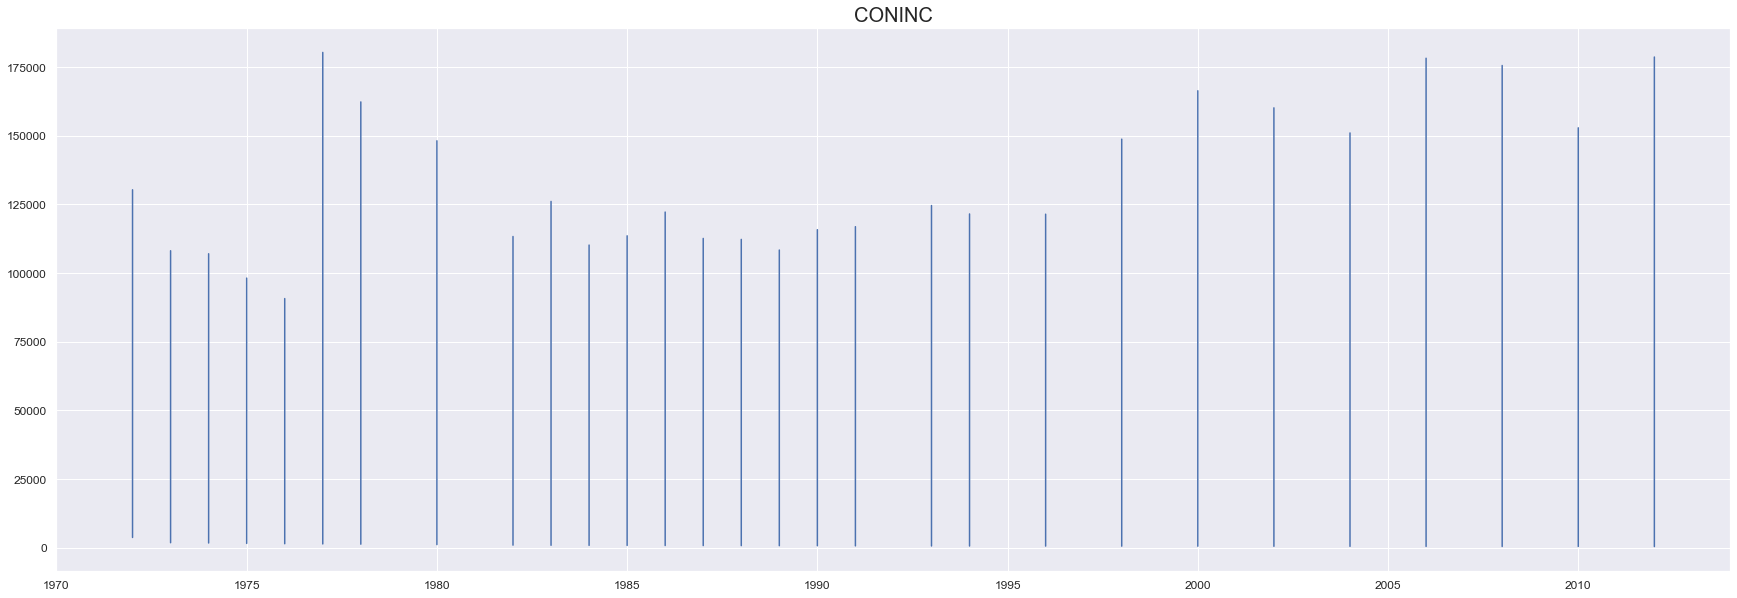

In [16]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.year,y=df.coninc,data=df, estimator=None)
plt.title("CONINC", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.show()

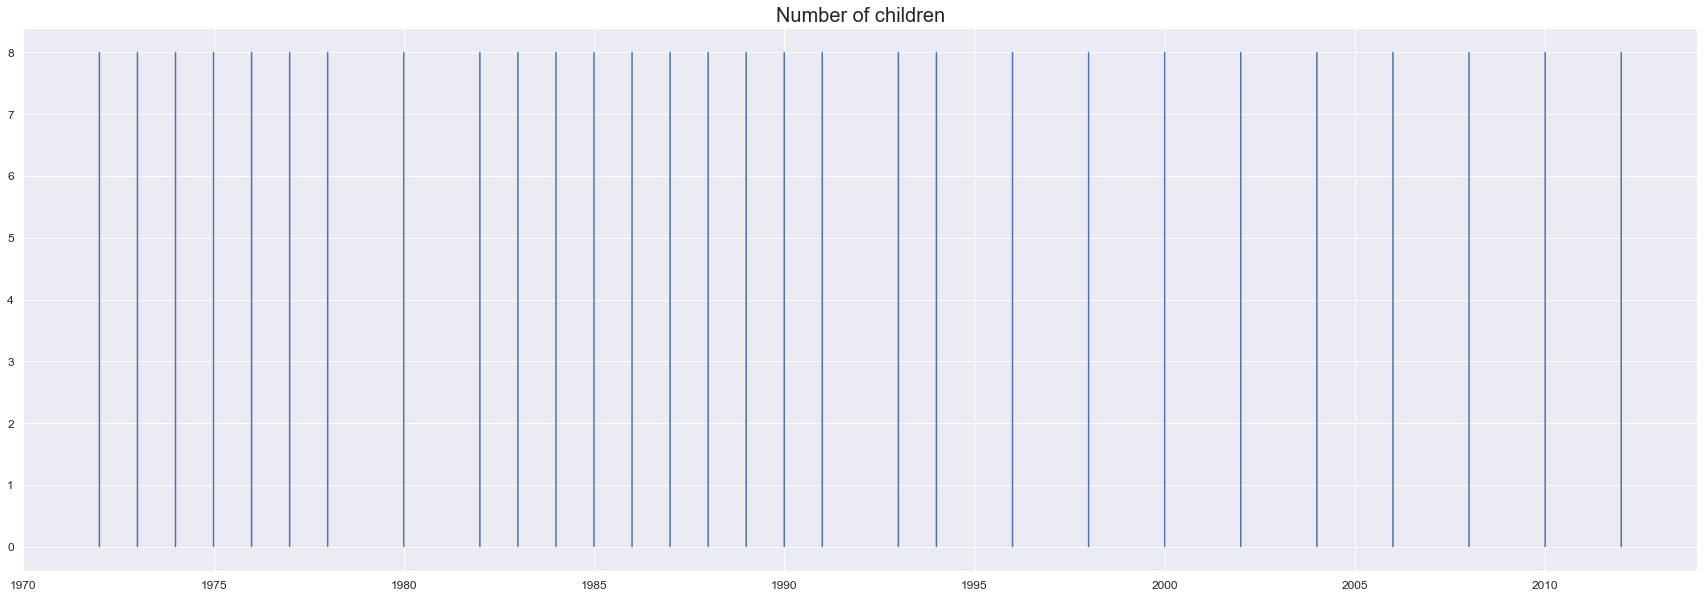

In [17]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.year,y=df.childs,data=df, estimator=None)
plt.title("Number of children", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.show()

### Pairplots

<Figure size 1440x1440 with 0 Axes>

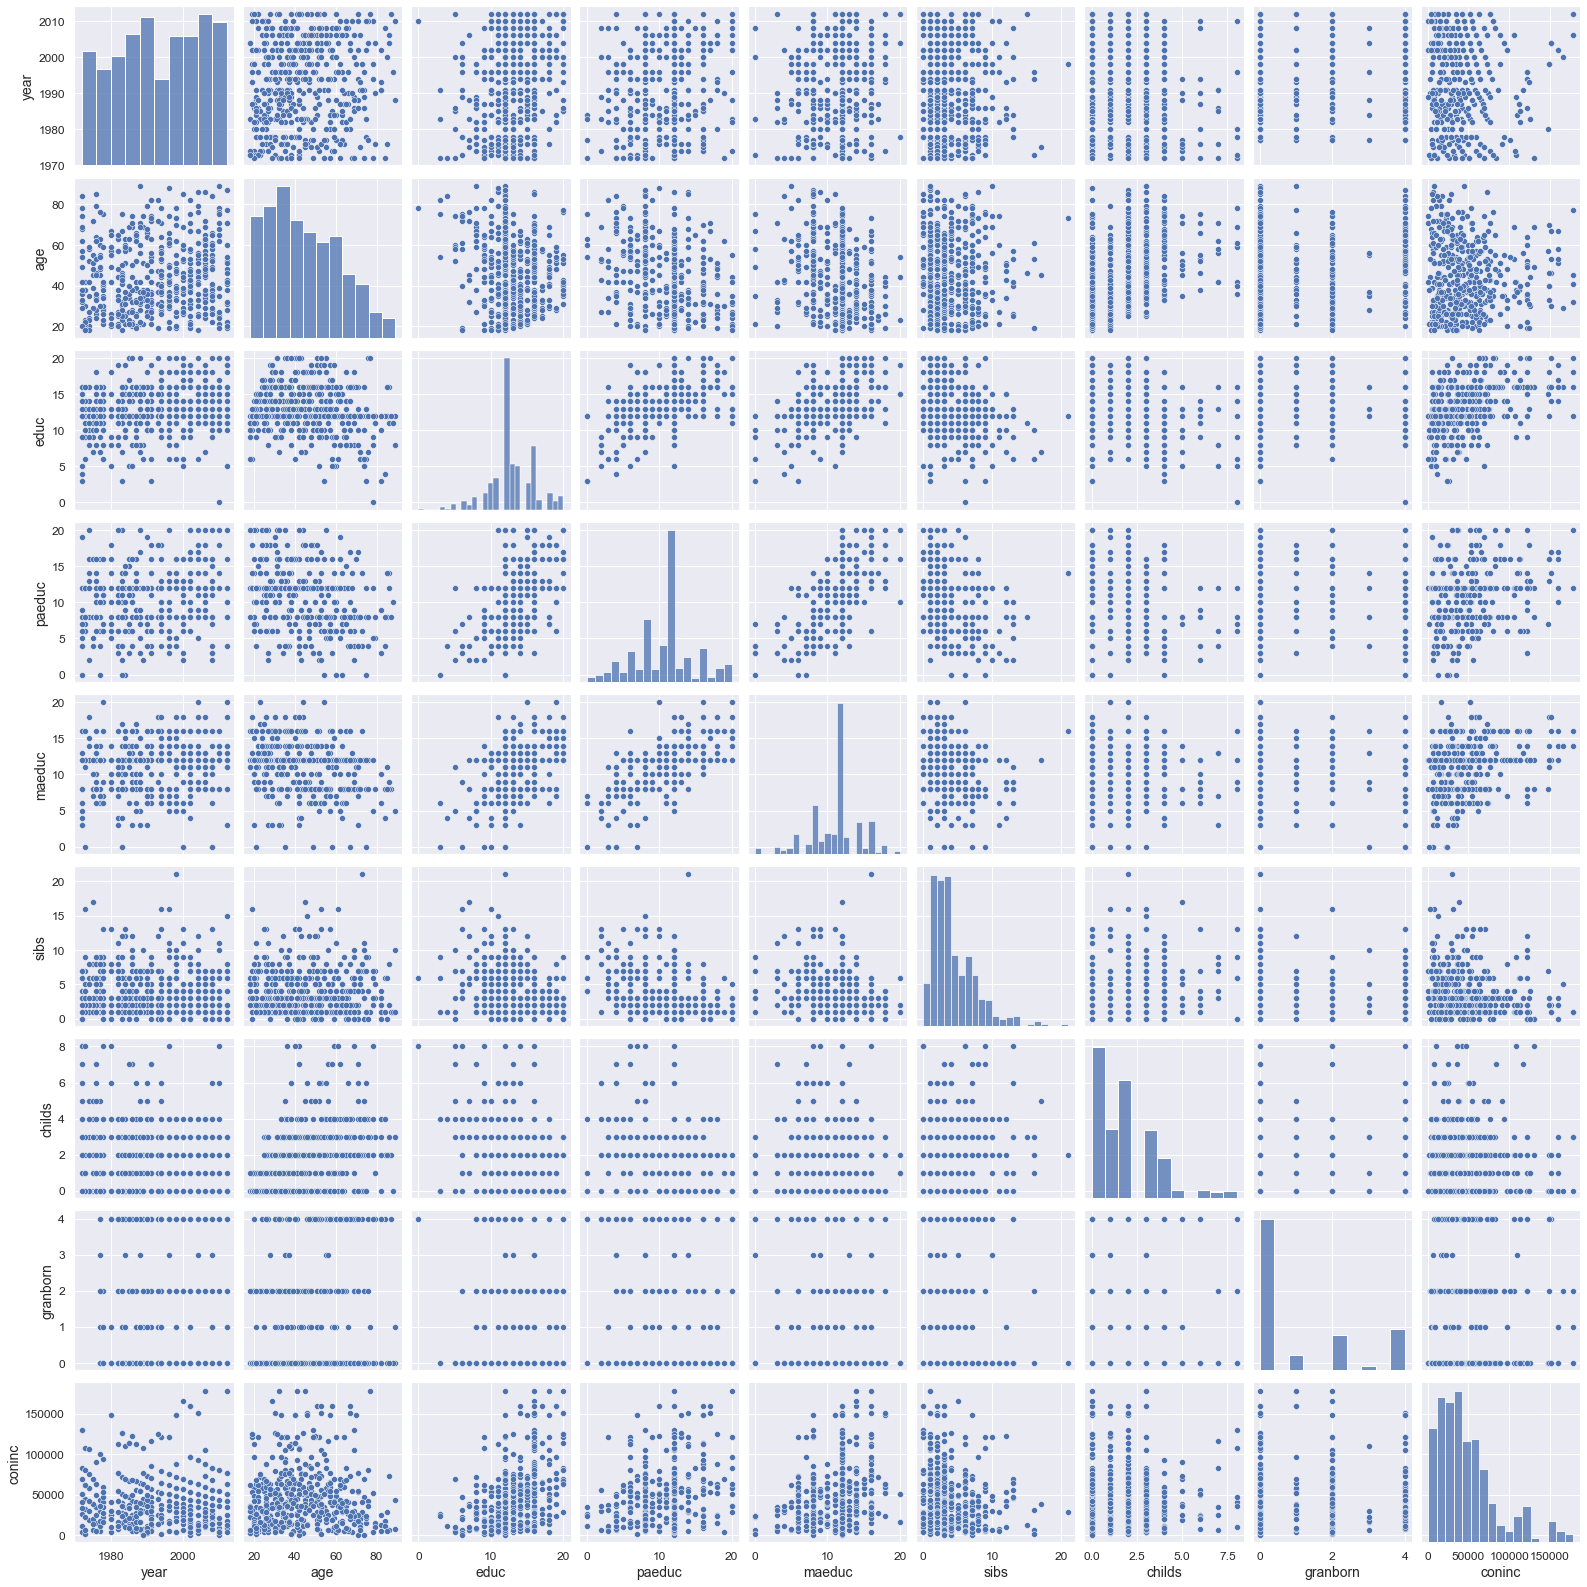

In [18]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df.sample(500))
plt.show()

### Bivariate Data Exploration

### Regression plot

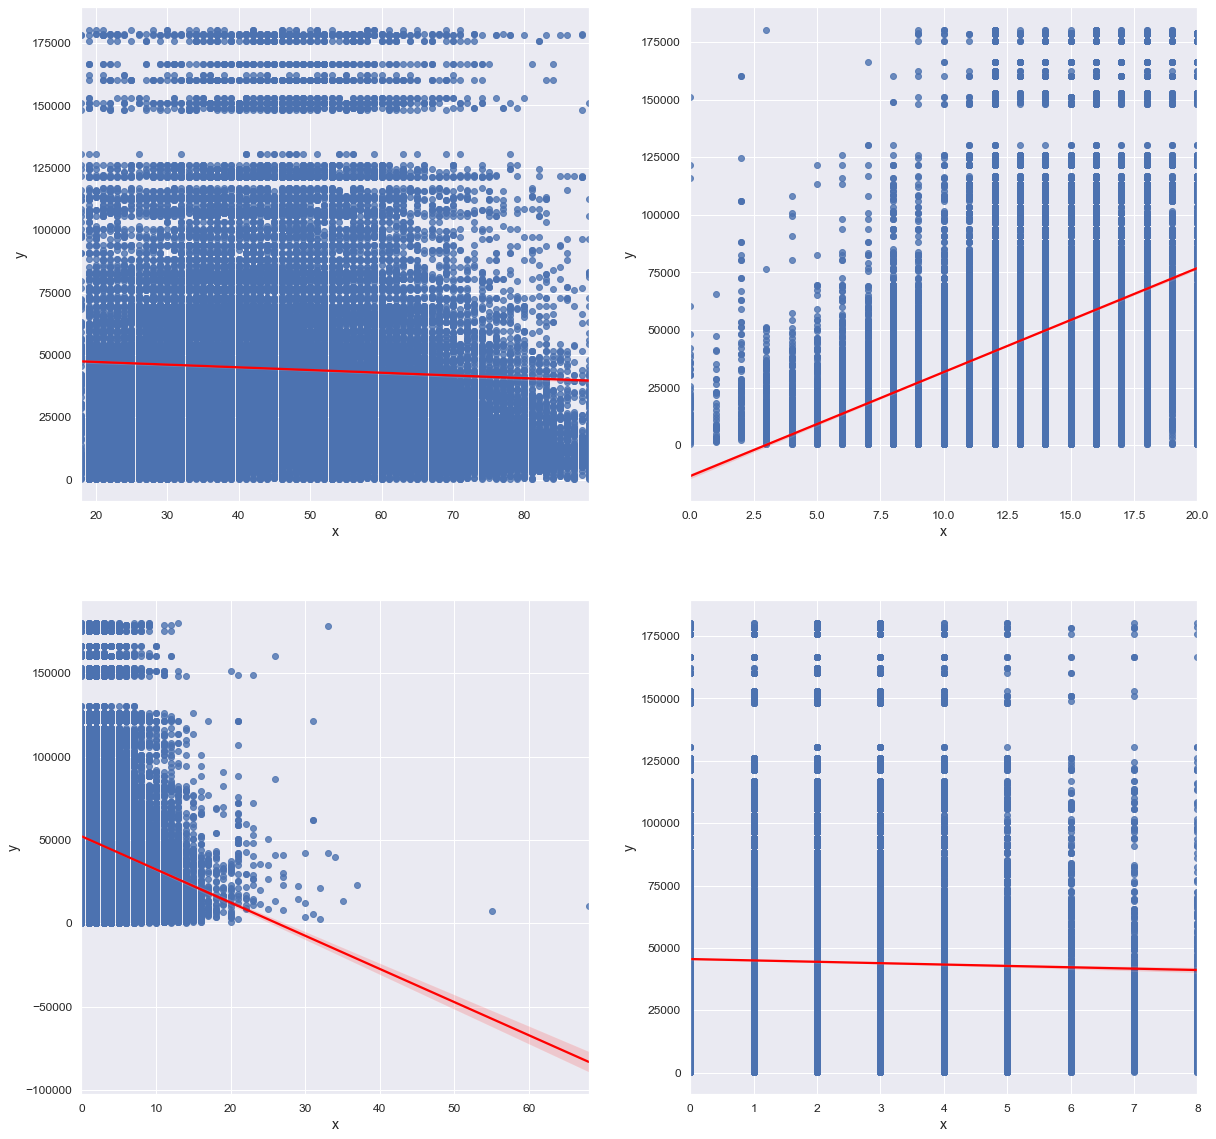

In [19]:
line_color = {'color': 'red'}
fig , ax = plt.subplots(2,2, figsize=(20,20))

#

ax1 = sns.regplot(x=df.age, y=df.coninc, line_kws=line_color, ax=ax[0,0])
ax1.set_xlabel("x")
ax1.set_ylabel("y")


#

ax2 = sns.regplot(x=df.educ, y=df.coninc, line_kws=line_color, ax=ax[0,1])
ax2.set_xlabel("x")
ax2.set_ylabel("y")


#

ax3 = sns.regplot(x=df.sibs, y=df.coninc, line_kws=line_color, ax=ax[1,0])
ax3.set_xlabel("x")
ax3.set_ylabel("y")

#

ax4 = sns.regplot(x=df.childs, y=df.coninc, line_kws=line_color, ax=ax[1,1])
ax4.set_xlabel("x")
ax4.set_ylabel("y")

plt.show()

### Correlation

In [20]:
df.corr()

,year,age,educ,paeduc,maeduc,sibs,childs,granborn,coninc
year,1.000000,0.054923,0.207956,0.205139,0.205965,-0.075970,-0.060195,-0.009342,0.101219
age,0.054923,1.000000,-0.204311,-0.312058,-0.324715,0.126142,0.360464,0.109490,-0.051520
educ,0.207956,-0.204311,1.000000,0.490471,0.475221,-0.308237,-0.251144,0.025626,0.397028
paeduc,0.205139,-0.312058,0.490471,1.000000,0.686664,-0.306335,-0.271118,-0.080621,0.236245
maeduc,0.205965,-0.324715,0.475221,0.686664,1.000000,-0.303662,-0.255953,-0.178196,0.222408
sibs,-0.075970,0.126142,-0.308237,-0.306335,-0.303662,1.000000,0.196186,0.008558,-0.177086
childs,-0.060195,0.360464,-0.251144,-0.271118,-0.255953,0.196186,1.000000,0.016764,-0.027291
granborn,-0.009342,0.109490,0.025626,-0.080621,-0.178196,0.008558,0.016764,1.000000,0.067567
coninc,0.101219,-0.051520,0.397028,0.236245,0.222408,-0.177086,-0.027291,0.067567,1.000000


In [21]:
df.corr()["coninc"].sort_values()

sibs       -0.177086
age        -0.051520
childs     -0.027291
granborn    0.067567
year        0.101219
maeduc      0.222408
paeduc      0.236245
educ        0.397028
coninc      1.000000
Name: coninc, dtype: float64

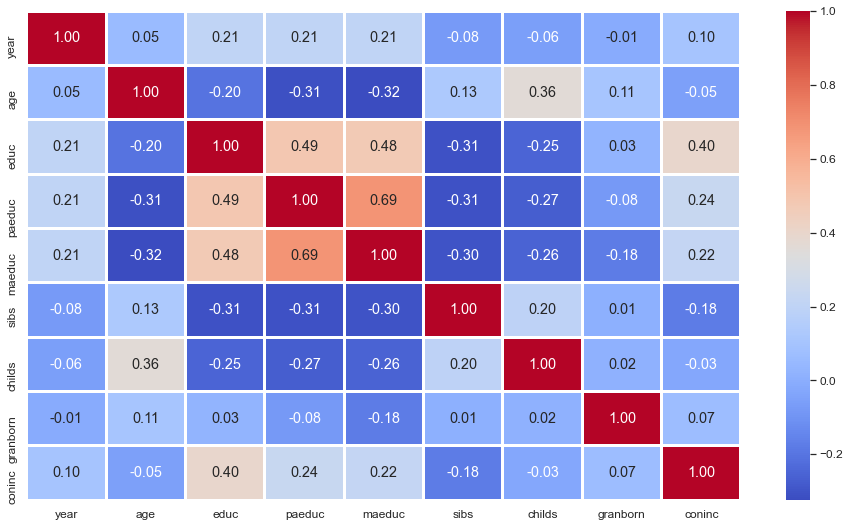

In [22]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

In [23]:
df.dropna(inplace=True)

## Hypothesis Testing

The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?” The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc). The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. Then compute the p-value, which is the probability of the null hypothesis being true, and finally interpret the result of the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.

### T-Test

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance


State the hypothesis

-   $H_0: µ\_1 = µ\_2$ ("there is no difference in evaluation scores between male and females")
-   $H_1: µ\_1 ≠ µ\_2$ ("there is a difference in evaluation scores between male and females")


### Levene's Test

In [24]:
scipy.stats.levene(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], center='mean')

NameError: name 'ratings_df' is not defined

## T-Test

### One Sample T-Test

In [ ]:
t, p = scipy.stats.ttest_1samp(a=df.dose, popmean=1.166667)

In [ ]:
print("T-test value is: ", t)
print("p-value value is: ", p)

### Two Samples T-Test

In [ ]:
t, p = scipy.stats.ttest_ind(a=df.len,b=df.dose, equal_var = True/False)

In [ ]:
print("T-test value is: ",t)
print("p-value value is: ",p)

### ANOVA

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable - using the example from the video, we will create a new column for this newly assigned group our categories will be teachers that are:

-   40 years and younger
-   between 40 and 57 years
-   57 years and older


State the hypothesis

-   $H_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ


### One Way ANOVA

In [ ]:
mod = ols('len~supp', data=df).fit()

In [ ]:
aov_table = sm.stats.anova_lm(mod,typ=2)

In [ ]:
aov_table

In [ ]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

### Two-way ANOVA

In [ ]:
mod1 = ols('len~supp+dose', data=df).fit()

In [ ]:
aov1 = sm.stats.anova_lm(mod1,typ=2)

In [ ]:
aov1

### Chi-square

State the hypothesis:

-   $H_0:$ The proportion of teachers who are tenured is independent of gender
-   $H_1:$ The proportion of teachers who are tenured is associated with gender

In [ ]:
#Create a Cross-tab table

cont_table  = pd.crosstab(ratings_df['tenure'], ratings_df['gender'])
cont_table

In [ ]:
scipy.stats.chi2_contingency(cont_table, correction = True)

In [ ]:
chi_square = scipy.stats.chi2_contingency(cont_table, correction = True)

In [ ]:
print(f"Chi score is", chi_square[0])

In [ ]:
print("P-value is", chi_square[1])

In [ ]:
print("Degrees of freedom is", chi_square[2])

### Correlation

State the hypothesis:

-   $H_0:$ Teaching evaluation score is not correlated with beauty score
-   $H_1:$ Teaching evaluation score is correlated with beauty score


In [ ]:
pearson_correlation = scipy.stats.pearsonr(ratings_df['beauty'], ratings_df['eval'])

In [ ]:
print("Pearson's correlation coefficient is", pearson_correlation[0])

In [ ]:
print("P-value is", pearson_correlation[1])

## Regression Analysis

In [25]:
df.columns

Index(['year', 'age', 'educ', 'paeduc', 'maeduc', 'sibs', 'childs', 'granborn', 'coninc'], dtype='object')

In [26]:
y = df['coninc']
X = df[['age','educ','sibs', 'childs', 'granborn']]

In [27]:
X = sm.add_constant(X)

In [28]:
model = sm.OLS(y,X).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 coninc   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     967.2
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        09:30:36   Log-Likelihood:            -3.3565e+05
No. Observations:               28226   AIC:                         6.713e+05
Df Residuals:                   28220   BIC:                         6.714e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.578e+04   1311.847    -12.031      0.000   -1.84e+04   -1.32e+04
age           17.3342     14.317      1.211      0.226     -10.729      45.397
educ        4670.8483     75.309     62.022      0.000    4523.239    4818.458
sibs        -922.1740     75.256    -12.254      0.000   -1069.679    -774.669
childs      2083.6274    142.008     14.673      0.000    1805.285    2361.969
granborn    1314.9978    134.525      9.775      0.000    1051.322    1578.674
==============================================================================
Omnibus:                     5023.386   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8782.576
Skew:                           1.154   Prob(JB):                         0.00
Kurtosis:                       4.463   Cond. No.                         305.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
prediction = model.predict(X)

In [31]:
prediction

7590     26331.136482
7593     60187.283893
7595     66568.733123
7596     55760.357981
7599     63633.609945
             ...     
57051    76805.944229
57055    30497.016685
57056    57241.810085
57058    48093.349887
57060    37882.384505
Length: 28226, dtype: float64

#### Python code done by Dennis Lam